In [1]:
import metpy
import numpy as np
import pandas as pd
import siphon
from datetime import datetime
from metpy.units import units
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Grabbing data with Siphon

In [2]:
date = datetime(2017, 9, 10, 6)
station = 'MFL'
df = WyomingUpperAir.request_data(date, station)
pressure = df['pressure'].values * units(df.units['pressure'])
temperature = df['temperature'].values * units(df.units['temperature'])
dewpoint = df['dewpoint'].values * units(df.units['dewpoint'])
u_wind = df['u_wind'].values * units(df.units['u_wind'])
v_wind = df['v_wind'].values * units(df.units['v_wind'])
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation
0,1002.0,5,24.0,21.5,85.0,20.0,-19.923894,-1.743115e+00,MFL,72202,2017-09-10 06:00:00,25.75,-80.38,5.0
1,1000.0,19,24.2,NaN,85.0,21.0,-20.920089,-1.830271e+00,MFL,72202,2017-09-10 06:00:00,25.75,-80.38,5.0
2,994.0,72,25.0,NaN,85.0,26.0,-25.901062,-2.266049e+00,MFL,72202,2017-09-10 06:00:00,25.75,-80.38,5.0
3,978.0,214,24.2,NaN,85.0,38.0,-37.855399,-3.311918e+00,MFL,72202,2017-09-10 06:00:00,25.75,-80.38,5.0
4,967.8,305,23.5,NaN,85.0,46.0,-45.824956,-4.009164e+00,MFL,72202,2017-09-10 06:00:00,25.75,-80.38,5.0
5,934.5,610,21.3,NaN,90.0,53.0,-53.000000,-3.245314e-15,MFL,72202,2017-09-10 06:00:00,25.75,-80.38,5.0
6,925.0,699,20.6,NaN,95.0,57.0,-56.783098,4.967877e+00,MFL,72202,2017-09-10 06:00:00,25.75,-80.38,5.0
7,902.2,914,19.3,NaN,105.0,64.0,-61.819253,1.656442e+01,MFL,72202,2017-09-10 06:00:00,25.75,-80.38,5.0
8,894.0,993,18.8,NaN,108.0,66.0,-62.769730,2.039512e+01,MFL,72202,2017-09-10 06:00:00,25.75,-80.38,5.0
9,870.8,1219,18.2,NaN,115.0,70.0,-63.441545,2.958328e+01,MFL,72202,2017-09-10 06:00:00,25.75,-80.38,5.0


# MetPy Sounding

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

In [4]:
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']
# Use sample data below, or use the Siphon data
# df = pd.read_fwf(get_test_data('may4_sounding.txt', as_file_obj=False),
#                  skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)
# df['u_wind'], df['v_wind'] = mpcalc.get_wind_components(df['speed'],np.deg2rad(df['direction']))
# Drop any rows with all NaN values for T, Td, winds
df = df.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed',
                       'u_wind', 'v_wind'), how='all').reset_index(drop=True)

In [5]:
p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees
u, v = mpcalc.get_wind_components(wind_speed, wind_dir)

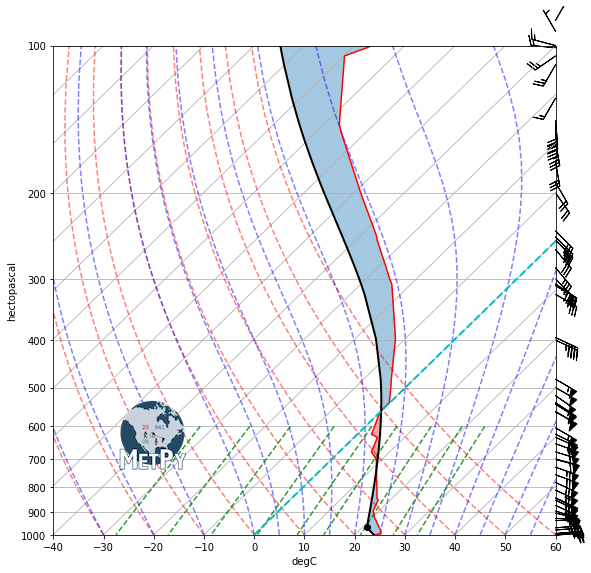

In [8]:
fig = plt.figure(figsize=(9, 9))
add_metpy_logo(fig, 115, 100)
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
# This would be *easy* to incorporate into my own API!
# All it does is calcualte the parcel profile with the *calculations* part of
# the API, then has an easy matplotlib wrapper function to shade stuff!
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, prof)
skew.shade_cape(p, T, prof)

# An example of a slanted line at constant T -- in this case the 0
# isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
# These could also be included
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
fig.patch.set_alpha(1)

In [ ]:
ls /Users/ldavis/anaconda3/lib/python3.6/site-packages/metpy/../

# Matplotlib SkewT

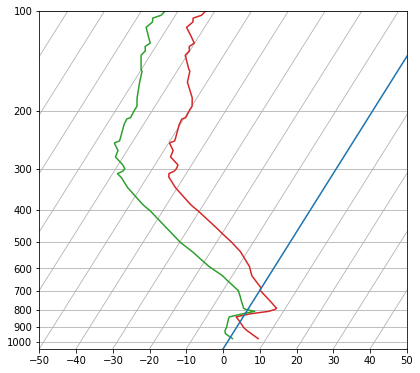

In [9]:
from matplotlib.axes import Axes
import matplotlib.transforms as transforms
import matplotlib.axis as maxis
import matplotlib.spines as mspines
from matplotlib.projections import register_projection
plt.close('all')

# The sole purpose of this class is to look at the upper, lower, or total
# interval as appropriate and see what parts of the tick to draw, if any.
class SkewXTick(maxis.XTick):
    def update_position(self, loc):
        # This ensures that the new value of the location is set before
        # any other updates take place
        self._loc = loc
        super(SkewXTick, self).update_position(loc)
    def _has_default_loc(self):
        return self.get_loc() is None
    def _need_lower(self):
        return (self._has_default_loc() or
                transforms.interval_contains(self.axes.lower_xlim,
                                             self.get_loc()))
    def _need_upper(self):
        return (self._has_default_loc() or
                transforms.interval_contains(self.axes.upper_xlim,
                                             self.get_loc()))
    @property
    def gridOn(self):
        return (self._gridOn and (self._has_default_loc() or
                transforms.interval_contains(self.get_view_interval(),
                                             self.get_loc())))
    @gridOn.setter
    def gridOn(self, value):
        self._gridOn = value
    @property
    def tick1On(self):
        return self._tick1On and self._need_lower()
    @tick1On.setter
    def tick1On(self, value):
        self._tick1On = value
    @property
    def label1On(self):
        return self._label1On and self._need_lower()
    @label1On.setter
    def label1On(self, value):
        self._label1On = value
    @property
    def tick2On(self):
        return self._tick2On and self._need_upper()
    @tick2On.setter
    def tick2On(self, value):
        self._tick2On = value
    @property
    def label2On(self):
        return self._label2On and self._need_upper()
    @label2On.setter
    def label2On(self, value):
        self._label2On = value
    def get_view_interval(self):
        return self.axes.xaxis.get_view_interval()

# This class exists to provide two separate sets of intervals to the tick,
# as well as create instances of the custom tick
class SkewXAxis(maxis.XAxis):
    def _get_tick(self, major):
        return SkewXTick(self.axes, None, '', major=major)
    def get_view_interval(self):
        return self.axes.upper_xlim[0], self.axes.lower_xlim[1]

# This class exists to calculate the separate data range of the
# upper X-axis and draw the spine there. It also provides this range
# to the X-axis artist for ticking and gridlines
class SkewSpine(mspines.Spine):
    def _adjust_location(self):
        pts = self._path.vertices
        if self.spine_type == 'top':
            pts[:, 0] = self.axes.upper_xlim
        else:
            pts[:, 0] = self.axes.lower_xlim

# This class handles registration of the skew-xaxes as a projection as well
# as setting up the appropriate transformations. It also overrides standard
# spines and axes instances as appropriate.
class SkewXAxes(Axes):
    # The projection must specify a name.  This will be used be the
    # user to select the projection, i.e. ``subplot(111,
    # projection='skewx')``.
    name = 'skewx'
    def _init_axis(self):
        # Taken from Axes and modified to use our modified X-axis
        self.xaxis = SkewXAxis(self)
        self.spines['top'].register_axis(self.xaxis)
        self.spines['bottom'].register_axis(self.xaxis)
        self.yaxis = maxis.YAxis(self)
        self.spines['left'].register_axis(self.yaxis)
        self.spines['right'].register_axis(self.yaxis)
    def _gen_axes_spines(self):
        spines = {'top': SkewSpine.linear_spine(self, 'top'),
                  'bottom': mspines.Spine.linear_spine(self, 'bottom'),
                  'left': mspines.Spine.linear_spine(self, 'left'),
                  'right': mspines.Spine.linear_spine(self, 'right')}
        return spines
    def _set_lim_and_transforms(self):
        """
        This is called once when the plot is created to set up all the
        transforms for the data, text and grids.
        """
        rot = 30

        # Get the standard transform setup from the Axes base class
        Axes._set_lim_and_transforms(self)

        # Need to put the skew in the middle, after the scale and limits,
        # but before the transAxes. This way, the skew is done in Axes
        # coordinates thus performing the transform around the proper origin
        # We keep the pre-transAxes transform around for other users, like the
        # spines for finding bounds
        self.transDataToAxes = self.transScale + \
            self.transLimits + transforms.Affine2D().skew_deg(rot, 0)

        # Create the full transform from Data to Pixels
        self.transData = self.transDataToAxes + self.transAxes

        # Blended transforms like this need to have the skewing applied using
        # both axes, in axes coords like before.
        self._xaxis_transform = (transforms.blended_transform_factory(
            self.transScale + self.transLimits,
            transforms.IdentityTransform()) +
            transforms.Affine2D().skew_deg(rot, 0)) + self.transAxes
    @property
    def lower_xlim(self):
        return self.axes.viewLim.intervalx
    @property
    def upper_xlim(self):
        pts = [[0., 1.], [1., 1.]]
        return self.transDataToAxes.inverted().transform(pts)[:, 0]


# Now register the projection with matplotlib so the user can select
# it.
register_projection(SkewXAxes)

if __name__ == '__main__':
    # Now make a simple example using the custom projection.
    from matplotlib.ticker import (MultipleLocator, NullFormatter, ScalarFormatter)
    import matplotlib.pyplot as plt
    from six import StringIO
    import numpy as np
    # Some examples data
    data_txt = '''
  978.0    345    7.8    0.8     61   4.16    325     14  282.7  294.6  283.4
  971.0    404    7.2    0.2     61   4.01    327     17  282.7  294.2  283.4
  946.7    610    5.2   -1.8     61   3.56    335     26  282.8  293.0  283.4
  944.0    634    5.0   -2.0     61   3.51    336     27  282.8  292.9  283.4
  925.0    798    3.4   -2.6     65   3.43    340     32  282.8  292.7  283.4
  911.8    914    2.4   -2.7     69   3.46    345     37  282.9  292.9  283.5
  906.0    966    2.0   -2.7     71   3.47    348     39  283.0  293.0  283.6
  877.9   1219    0.4   -3.2     77   3.46      0     48  283.9  293.9  284.5
  850.0   1478   -1.3   -3.7     84   3.44      0     47  284.8  294.8  285.4
  841.0   1563   -1.9   -3.8     87   3.45    358     45  285.0  295.0  285.6
  823.0   1736    1.4   -0.7     86   4.44    353     42  290.3  303.3  291.0
  813.6   1829    4.5    1.2     80   5.17    350     40  294.5  309.8  295.4
  809.0   1875    6.0    2.2     77   5.57    347     39  296.6  313.2  297.6
  798.0   1988    7.4   -0.6     57   4.61    340     35  299.2  313.3  300.1
  791.0   2061    7.6   -1.4     53   4.39    335     33  300.2  313.6  301.0
  783.9   2134    7.0   -1.7     54   4.32    330     31  300.4  313.6  301.2
  755.1   2438    4.8   -3.1     57   4.06    300     24  301.2  313.7  301.9
  727.3   2743    2.5   -4.4     60   3.81    285     29  301.9  313.8  302.6
  700.5   3048    0.2   -5.8     64   3.57    275     31  302.7  313.8  303.3
  700.0   3054    0.2   -5.8     64   3.56    280     31  302.7  313.8  303.3
  698.0   3077    0.0   -6.0     64   3.52    280     31  302.7  313.7  303.4
  687.0   3204   -0.1   -7.1     59   3.28    281     31  304.0  314.3  304.6
  648.9   3658   -3.2  -10.9     55   2.59    285     30  305.5  313.8  305.9
  631.0   3881   -4.7  -12.7     54   2.29    289     33  306.2  313.6  306.6
  600.7   4267   -6.4  -16.7     44   1.73    295     39  308.6  314.3  308.9
  592.0   4381   -6.9  -17.9     41   1.59    297     41  309.3  314.6  309.6
  577.6   4572   -8.1  -19.6     39   1.41    300     44  310.1  314.9  310.3
  555.3   4877  -10.0  -22.3     36   1.16    295     39  311.3  315.3  311.5
  536.0   5151  -11.7  -24.7     33   0.97    304     39  312.4  315.8  312.6
  533.8   5182  -11.9  -25.0     33   0.95    305     39  312.5  315.8  312.7
  500.0   5680  -15.9  -29.9     29   0.64    290     44  313.6  315.9  313.7
  472.3   6096  -19.7  -33.4     28   0.49    285     46  314.1  315.8  314.1
  453.0   6401  -22.4  -36.0     28   0.39    300     50  314.4  315.8  314.4
  400.0   7310  -30.7  -43.7     27   0.20    285     44  315.0  315.8  315.0
  399.7   7315  -30.8  -43.8     27   0.20    285     44  315.0  315.8  315.0
  387.0   7543  -33.1  -46.1     26   0.16    281     47  314.9  315.5  314.9
  382.7   7620  -33.8  -46.8     26   0.15    280     48  315.0  315.6  315.0
  342.0   8398  -40.5  -53.5     23   0.08    293     52  316.1  316.4  316.1
  320.4   8839  -43.7  -56.7     22   0.06    300     54  317.6  317.8  317.6
  318.0   8890  -44.1  -57.1     22   0.05    301     55  317.8  318.0  317.8
  310.0   9060  -44.7  -58.7     19   0.04    304     61  319.2  319.4  319.2
  306.1   9144  -43.9  -57.9     20   0.05    305     63  321.5  321.7  321.5
  305.0   9169  -43.7  -57.7     20   0.05    303     63  322.1  322.4  322.1
  300.0   9280  -43.5  -57.5     20   0.05    295     64  323.9  324.2  323.9
  292.0   9462  -43.7  -58.7     17   0.05    293     67  326.2  326.4  326.2
  276.0   9838  -47.1  -62.1     16   0.03    290     74  326.6  326.7  326.6
  264.0  10132  -47.5  -62.5     16   0.03    288     79  330.1  330.3  330.1
  251.0  10464  -49.7  -64.7     16   0.03    285     85  331.7  331.8  331.7
  250.0  10490  -49.7  -64.7     16   0.03    285     85  332.1  332.2  332.1
  247.0  10569  -48.7  -63.7     16   0.03    283     88  334.7  334.8  334.7
  244.0  10649  -48.9  -63.9     16   0.03    280     91  335.6  335.7  335.6
  243.3  10668  -48.9  -63.9     16   0.03    280     91  335.8  335.9  335.8
  220.0  11327  -50.3  -65.3     15   0.03    280     85  343.5  343.6  343.5
  212.0  11569  -50.5  -65.5     15   0.03    280     83  346.8  346.9  346.8
  210.0  11631  -49.7  -64.7     16   0.03    280     83  349.0  349.1  349.0
  200.0  11950  -49.9  -64.9     15   0.03    280     80  353.6  353.7  353.6
  194.0  12149  -49.9  -64.9     15   0.03    279     78  356.7  356.8  356.7
  183.0  12529  -51.3  -66.3     15   0.03    278     75  360.4  360.5  360.4
  164.0  13233  -55.3  -68.3     18   0.02    277     69  365.2  365.3  365.2
  152.0  13716  -56.5  -69.5     18   0.02    275     65  371.1  371.2  371.1
  150.0  13800  -57.1  -70.1     18   0.02    275     64  371.5  371.6  371.5
  136.0  14414  -60.5  -72.5     19   0.02    268     54  376.0  376.1  376.0
  132.0  14600  -60.1  -72.1     19   0.02    265     51  380.0  380.1  380.0
  131.4  14630  -60.2  -72.2     19   0.02    265     51  380.3  380.4  380.3
  128.0  14792  -60.9  -72.9     19   0.02    266     50  381.9  382.0  381.9
  125.0  14939  -60.1  -72.1     19   0.02    268     49  385.9  386.0  385.9
  119.0  15240  -62.2  -73.8     20   0.01    270     48  387.4  387.5  387.4
  112.0  15616  -64.9  -75.9     21   0.01    265     53  389.3  389.3  389.3
  108.0  15838  -64.1  -75.1     21   0.01    265     58  394.8  394.9  394.8
  107.8  15850  -64.1  -75.1     21   0.01    265     58  395.0  395.1  395.0
  105.0  16010  -64.7  -75.7     21   0.01    272     50  396.9  396.9  396.9
  103.0  16128  -62.9  -73.9     21   0.02    277     45  402.5  402.6  402.5
  100.0  16310  -62.5  -73.5     21   0.02    285     36  406.7  406.8  406.7
    '''

    # Parse the data
    sound_data = StringIO(data_txt)
    p, h, T, Td = np.loadtxt(sound_data, usecols=range(0, 4), unpack=True)

    # Create a new figure. The dimensions here give a good aspect ratio
    fig = plt.figure(figsize=(6.5875, 6.2125))
    ax = fig.add_subplot(111, projection='skewx')

    plt.grid(True)

    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot
    ax.semilogy(T, p, color='C3')
    ax.semilogy(Td, p, color='C2')

    # An example of a slanted line at constant X
    l = ax.axvline(0, color='C0')

    # Disables the log-formatting that comes with semilogy
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())
    ax.set_yticks(np.linspace(100, 1000, 10))
    ax.set_ylim(1050, 100)

    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.set_xlim(-50, 50)
fig.patch.set_alpha(1)

In [40]:
!ls

CONSTANTS.pyc   cmap.py         const.py        learning        plot.py
README.md       cmaps           fonts           maptest-top.pdf plots1.ipynb
__init__.py     cmaps.zip       fonts.ipynb     maptest.pdf     plots2.ipynb
__init__.pyc    colormaps.pdf   fontsetup       metpy.ipynb     send2trash
__pycache__     colors.pdf      julia.ipynb     pandas.ipynb    tools.py
